# Double Pendulum Using Lagrangian Mechanics

Uses numerical DiffEq solution to find the behavior of a double pendulum using Lagrange's equations

Last Edited: 4/29/22 By: Matthew Freudenrich

The doulbe pendulum being solved is characterized by two generalized coordinates, $\phi$ and $\theta$. These define the angle of the first and second arms respectively to the horizontal.
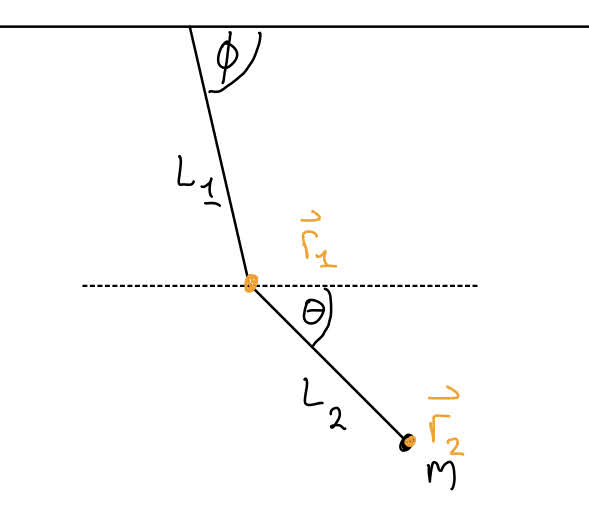

The position of $\vec{r}_1$ can be expressed as:

$\vec{r}_1 = L_1 cos(\phi)\hat{x} - L_1 sin(\phi)\hat{y}$

and the position of $\vec{r}_2$ can be expressed as: 

$\vec{r}_2 = (\vec{r}_1 \cdot \hat{x} + L_2 cos(\theta))\hat{x} + (\vec{r}_1 \cdot \hat{y} - L_2 sin(\theta))\hat{y}$

or:

$\vec{r}_2 = (L_1 cos(\phi) + L_2 cos(\theta))\hat{x} - (L_1 sin(\phi) + L_2 sin(\theta))\hat{y}$

This allows the square of the velocity vector to be expressed as:

$\left( \frac{d \vec{r}_2}{dt} \right) ^2 = (L_1 \dot{\phi})^2 + (L_2 \dot{\theta})^2 + 2 L_1 L_2 \dot{\theta} \dot{\phi} cos(\phi -\theta)$

So that the kinetic energy of the pendulum is:

$T = \frac{1}{2}m (\dot{\vec{r}_2})^2 = \frac{m}{2}(L_1 \dot{\phi})^2 + \frac{m}{2}(L_2 \dot{\theta})^2 + mL_1 L_2 \dot{\theta} \dot{\phi} cos(\phi -\theta)$

And the gravitational potential energy of the pendulum is:

$U = mg\vec{r}_2 \cdot \hat{y} = -mg(L_1 sin(\phi) + L_2 sin(\theta))$

The Lagrangian can now be defined 

$\mathcal{L} = T - U = \frac{m}{2}(L_1 \dot{\phi})^2 + \frac{m}{2}(L_2 \dot{\theta})^2 + mL_1 L_2 \dot{\theta} \dot{\phi} cos(\phi -\theta) + mg(L_1 sin(\phi) + L_2 sin(\theta))$

Solving the lagrange equation for the generalized variable $\phi$ gives 

$\frac{\partial \mathcal{L} }{\partial \phi} = \frac{d}{dt}\frac{\partial \mathcal{L}}{\partial \dot{\phi}}$

$-m L_1 L_2 \dot{\phi} \dot{\theta} sin(\phi - \theta) + m g L_1 cos(\phi) = m L_1^2 \ddot{\phi} + m L_1 L_2 (\ddot{\theta} cos(\phi - \theta) - \dot{\theta}(\dot{\phi} - \dot{\theta})sin(\phi - \theta))$

Solving the lagrange equation for the generalized variable $\theta$ gives

$\frac{\partial \mathcal{L} }{\partial \theta} = \frac{d}{dt}\frac{\partial \mathcal{L}}{\partial \dot{\theta}}$

$m L_1 L_2 \dot{\phi} \dot{\theta} sin(\phi - \theta) + m g L_2 cos(\theta) = m L_2^2 \ddot{\theta} + m L_1 L_2(\ddot{\phi} cos(\phi - \theta) - \dot{\phi}(\dot{\phi} - \dot{\theta})sin(\phi - \theta))$

This pair of coupled equations gives expressions for $\ddot{\phi}$ and $\ddot{\theta}$

$\ddot{\phi} = \frac{1}{L_1} csc(\theta - \phi)(\dot{\theta} \dot{\phi}L_2 + \dot{\theta} \dot{\phi} L_1 cos(\theta - \phi) + (\dot{\theta} - \dot{\phi})(\dot{\phi}L_1 cos(\theta - \phi) - L_2 \dot{\theta})csc(\theta - \phi)sin(\phi - \theta) + g sin(\theta))$

$\ddot{\theta} = -\frac{1}{L_2} csc(\theta - \phi)(\dot{\theta} \dot{\phi}L_1 + \dot{\theta} \dot{\phi} L_2 cos(\theta - \phi) - (\dot{\theta} -\dot{\phi})(\dot{\theta} L_2 cos(\theta - \phi) - L_1 \dot{\phi})csc(\theta - \phi)sin(\phi-\theta) + g sin(\phi))$


The following code defines the class used to solved the pendulum

In [ ]:
%matplotlib inline
import numpy as np
from scipy.integrate import odeint, solve_ivp

import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 100.    # this is the default for notebook

# Change the common font size (smaller when higher dpi)
font_size = 10
plt.rcParams.update({'font.size': font_size})

class LagrangianPendulum():
    """
    Pendulum class implements the parameters and Lagrange's equations for 
     a simple pendulum (no driving or damping).
     
    Parameters
    ----------
    L : float
        length of the simple pendulum
    g : float
        gravitational acceleration at the earth's surface
    omega_0 : float
        natural frequency of the pendulum (\sqrt{g/l} where l is the 
        pendulum length) 
    mass : float
        mass of pendulum

    Methods
    -------
    dy_dt(t, y)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    """
    def __init__(self, L1=1., L2=1., m=1., g=1.
                ):
        self.L1 = L1
        self.L2 = L2
        self.g = g
        self.m = m
    
    def dy_dt(self, t, y):
        """
        This function returns the right-hand side of the diffeq: 
        [dphi/dt d^2phi/dt^2 dtheta/dt d^2theta/dt^2]
        
        Parameters
        ----------
        t : float
            time 
        y : float
            A 4-component vector with y[0] = phi(t) and y[1] = dphi/dt
            with y[2]=theta(t) and y[3]=dtheta/dt
            
        Returns
        -------
        
        """
        return [y[1], (1./L1)*(1./np.sin(y[2]-y[0]))*(y[1]*y[3]*L2 + y[1]*y[3]*L1*np.cos(y[2]-y[0]) + \
                                                (y[3]-y[1])*(y[1]*L1*np.cos(y[2]-y[0]) - \
                                                             L2*y[3])*(1./np.sin(y[2]-y[0]))*np.sin(y[0]-y[2]) + g*np.sin(y[2])),\
                y[3], -(1./L2)*(1./np.sin(y[2]-y[0]))*(y[1]*y[3]*L1 + y[1]*y[3]*L2*np.cos(y[2]-y[0]) - \
                                                (y[3]-y[1])*(y[3]*L2*np.cos(y[2]-y[0]) - \
                                                             L1*y[1])*(1./np.sin(y[2]-y[0]))*np.sin(y[0]-y[2]) + g*np.sin(y[0])) ]
    
    def solve_ode(self, t_pts, phi_0, phi_dot_0, theta_0, theta_dot_0, 
                  abserr=1.0e-9, relerr=1.0e-9):
        """
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [phi_0, phi_dot_0, theta_0, theta_dot_0] 
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        phi, phi_dot, theta, theta_dot = solution.y

        return phi, phi_dot, theta, theta_dot

The following code defines the plotting functions

In [ ]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

We can now plot the solution to the double pendulum. 

In [ ]:
# Labels for individual plot axes
phi_vs_time_labels = (r'$t$', r'$\phi(t)$')
phi_dot_vs_time_labels = (r'$t$', r'$d\phi/dt(t)$')
theta_vs_time_labels = (r'$t$', r'$\theta(t)$')
theta_dot_vs_time_labels = (r'$t$', r'$d\theta/dt(t)$')
phi_state_space_labels = (r'$\phi$', r'$d\phi/dt$')
theta_state_space_labels = (r'$\theta$', r'$d\theta/dt$')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 50.
delta_t = 0.01

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  


#Pendulum parameters
L1 = 1
L2 = 1
m = 1
g = 1

#Initiate a pendulum

p1 = LagrangianPendulum(L1 = L1, L2 = L2, m = m, g = g)

#Initial conditions
phi_0 = np.pi/2
phi_dot_0 = 0.
theta_0 = np.pi/2 + 0.1
theta_dot_0 = 0.
phi, phi_dot, theta, theta_dot = p1.solve_ode(t_pts, phi_0, phi_dot_0, theta_0, theta_dot_0)


In [ ]:
# start the plot!
fig = plt.figure(figsize=(15,5))
overall_title = 'Double Pendulum Using Lagrangian Mechanics  ' + '\n' + \
                rf' $L1 = {L1:.2f},$' + \
                rf' $L2= {L2:.2f},$' + \
                rf' $\theta_0 = {theta_0:.2f},$' + \
                rf' $\dot\theta_0 = {theta_dot_0:.2f},$' + \
                rf' $g = {g:.2f},$' + \
                rf'  $\phi_0 = {phi_0:.2f},$' + \
                rf' $\dot\phi_0 = {phi_dot_0:.2f}$' + \
                '\n'  
fig.suptitle(overall_title, va='baseline')

# first plot: phi vs time
ax_a = fig.add_subplot(1,3,1)                  

start, stop = start_stop_indices(t_pts, 0., 40.)    
plot_y_vs_x(t_pts[start : stop], phi[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label=None, 
            title='$\phi(t)$', 
            ax=ax_a)    
                          
# second plot: phi dot vs time 
ax_b = fig.add_subplot(1,3,2)                  

start, stop = start_stop_indices(t_pts, 0., 40.)    
plot_y_vs_x(t_pts[start : stop], phi_dot[start : stop], 
            axis_labels=phi_dot_vs_time_labels, 
            color='blue',
            label=None, 
            title='$\dot\phi(t)$', 
            ax=ax_b)    

# third plot: state space plot from t=30 to t=50   

ax_c = fig.add_subplot(1,3,3)                  

start, stop = start_stop_indices(t_pts, 0., 50.)    
plot_y_vs_x(phi[start : stop], phi_dot[start : stop], 
            axis_labels=phi_state_space_labels, 
            color='blue',
            label=None, 
            title=rf'$30 \leq t \leq 50$', 
            ax=ax_c)    

fig.tight_layout()